## Importing Libraries

In [39]:
# Data Processing
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from scipy import stats

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score


# 1. Exploratory Data Analysis (EDTA)

### Exploring the dataset

In [40]:
def explore_dataset(df):
    """ Explore a pandas DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame to explore.
    """

    # Display the shape of the DataFrame
    print(f"Dataset shape: {df.shape}")

    # Display the first few rows of the DataFrame
    print(f"First few rows of the dataset:")
    display(df.head())

    # Display the summary statistics of the DataFrame
    print(f"Summary statistics of the dataset:")
    description = df.describe()
    display(description.round(2))

    # Display the information about the DataFrame
    print(f"Information about the dataset:")
    display(df.info())

    # Check for missing values in the DataFrame
    print(f"Total of Missing values for each column in the dataset:")
    print(df.isnull().sum())

In [41]:
churners_df = pd.read_csv('BankChurners.csv')
explore_dataset(churners_df)

Dataset shape: (10127, 23)
First few rows of the dataset:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Summary statistics of the dataset:


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27,0.16,0.84
std,3.690378e+07,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28,0.37,0.37
min,7.080821e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00,0.00,0.00
25%,7.130368e+08,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02,0.00,1.00
50%,7.179264e+08,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18,0.00,1.00
75%,7.731435e+08,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50,0.00,1.00
max,8.283431e+08,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00,1.00,1.00


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                            

None

Total of Missing values for each column in the dataset:
CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                  

In [42]:
# Delete the last 2 columns (read suggestion to ignore them)
churners_df = churners_df.drop(
    columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])


In [43]:
print(f"Rows, Columns: {churners_df.shape}")
churners_df.head()


Rows, Columns: (10127, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [44]:
explore_dataset(churners_df)

Dataset shape: (10127, 21)
First few rows of the dataset:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Summary statistics of the dataset:


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,3.690378e+07,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,7.080821e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,7.130368e+08,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,7.179264e+08,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,7.731435e+08,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,8.283431e+08,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              1012

None

Total of Missing values for each column in the dataset:
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [45]:
# Check for missing values
churners_ms = churners_df.isnull().sum()
print(f"Total of Missing values for each column in the dataset:\n\n{churners_ms}")

Total of Missing values for each column in the dataset:

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [46]:
# Checking for duplicated values
print(f"Number of duplicates in the df = {churners_df.duplicated().sum()}")

Number of duplicates in the df = 0


In [47]:
# Create DataFrame with dtype, unique values and number of missing values
df_info = pd.DataFrame(churners_df.dtypes, columns=['dtype'])
df_info['Unique'] = churners_df.nunique().values
df_info['Null'] = churners_df.isnull().sum().values
df_info

,dtype,Unique,Null
CLIENTNUM,int64,10127,0
Attrition_Flag,object,2,0
Customer_Age,int64,45,0
Gender,object,2,0
Dependent_count,int64,6,0
Education_Level,object,7,0
Marital_Status,object,4,0
Income_Category,object,6,0
Card_Category,object,4,0
Months_on_book,int64,44,0


In [48]:
# Drop 'CLIENTNUM' column
churners_df = churners_df.drop(columns=['CLIENTNUM'])

In [49]:
print(churners_df.shape)

(10127, 20)


### Categorical Variables and Numerical Variables

In [50]:
# Get the unique values of categorical columns
cat_cols = churners_df.select_dtypes(include = 'object').columns.tolist()
for col in cat_cols:
    unique_values = churners_df[col].unique()
    print(f"Unique values in '{col}' are: {unique_values}")


Unique values in 'Attrition_Flag' are: ['Existing Customer' 'Attrited Customer']
Unique values in 'Gender' are: ['M' 'F']
Unique values in 'Education_Level' are: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Unique values in 'Marital_Status' are: ['Married' 'Single' 'Unknown' 'Divorced']
Unique values in 'Income_Category' are: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Unique values in 'Card_Category' are: ['Blue' 'Gold' 'Silver' 'Platinum']


In [51]:
num_cols = churners_df.select_dtypes(include='int').columns.tolist()
for column in num_cols:
    unique_values = churners_df[column].unique()
    print(f"Unique values in '{column}' are : {unique_values}")

Unique values in 'Customer_Age' are : [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Unique values in 'Dependent_count' are : [3 5 4 2 0 1]
Unique values in 'Months_on_book' are : [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Unique values in 'Total_Relationship_Count' are : [5 6 4 3 2 1]
Unique values in 'Months_Inactive_12_mon' are : [1 4 2 3 6 0 5]
Unique values in 'Contacts_Count_12_mon' are : [3 2 0 1 4 5 6]
Unique values in 'Total_Revolving_Bal' are : [ 777  864    0 ...  534  476 2241]
Unique values in 'Total_Trans_Amt' are : [ 1144  1291  1887 ... 10291  8395 10294]
Unique values in 'Total_Trans_Ct' are : [ 42  33  20  28  24  31  36  32  26  17  29  27  21  30  16  18  23  22
  40  38  25  43  37  19  35  15  41  57  12  14  34  44  13  47  10  39
  53  50  52  48  49  45  11  55  46  54  60  51  63 

In [52]:
numeric_cols = churners_df.select_dtypes(include='float').columns.tolist()
for column in numeric_cols:
    max_value = churners_df[column].max()
    min_value = churners_df[column].min()
    print(f"Column '{column}': Max value = {max_value}, Min value = {min_value}")

Column 'Credit_Limit': Max value = 34516.0, Min value = 1438.3
Column 'Avg_Open_To_Buy': Max value = 34516.0, Min value = 3.0
Column 'Total_Amt_Chng_Q4_Q1': Max value = 3.397, Min value = 0.0
Column 'Total_Ct_Chng_Q4_Q1': Max value = 3.714, Min value = 0.0
Column 'Avg_Utilization_Ratio': Max value = 0.999, Min value = 0.0


### Univariate analysis

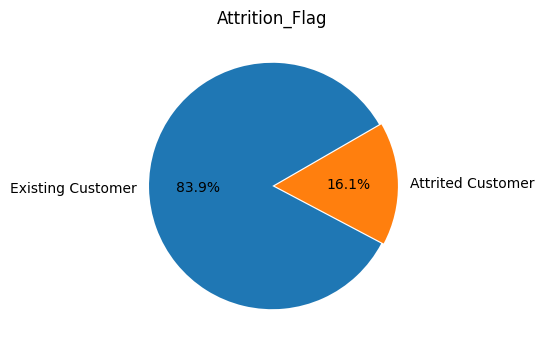

In [53]:
# Display Attrition_Flag ratio with pie chart
counts_att_flag = churners_df['Attrition_Flag'].value_counts()
plt.figure(figsize=(9,4))
plt.pie(counts_att_flag, labels=counts_att_flag.index, autopct='%1.1f%%'
        , startangle=30, explode=[0, 0.02])
plt.title('Attrition_Flag')
plt.show()

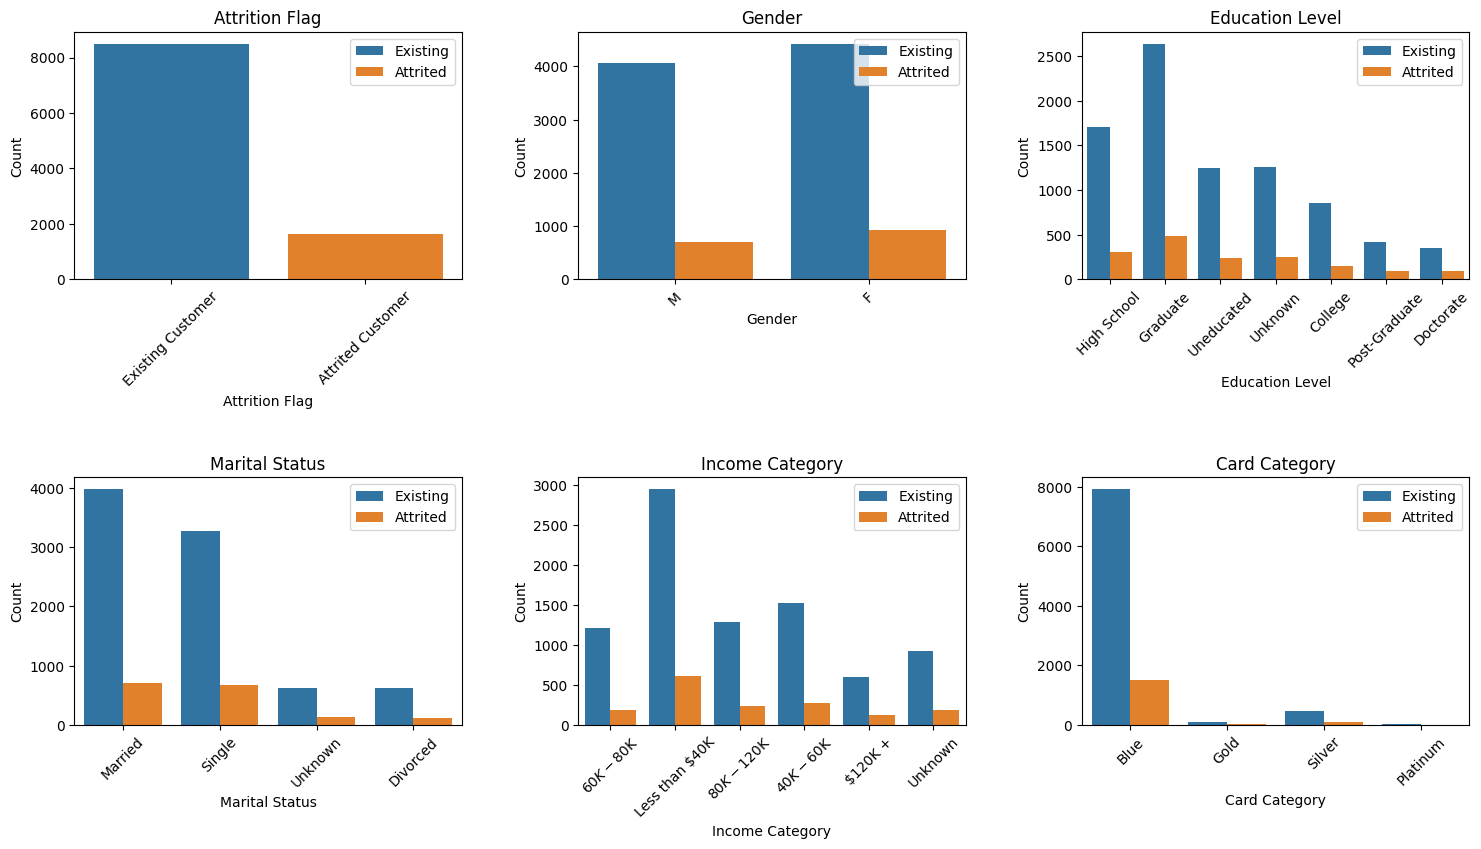

In [54]:
# Explore Categorical column
fig1, axarr1 = plt.subplots(2, 3, figsize=(18, 9))
plt.subplots_adjust(hspace=0.8, wspace=0.3)

# Configure new title
title_cat = ['Attrition Flag', 'Gender', 'Education Level', 'Marital Status', 'Income Category', 'Card Category']

# Generate bar chart using loop
for i, col in enumerate(cat_cols):
    sns.countplot(data=churners_df, x=churners_df[col], hue='Attrition_Flag', ax=axarr1[i // 3][i % 3])
    axarr1[i // 3][i % 3].set_xlabel(col.replace('_', ' '))
    axarr1[i // 3][i % 3].set_ylabel('Count')

    # Set ticks and rotate labels
    axarr1[i // 3][i % 3].set_xticks(range(len(churners_df[col].unique())))
    axarr1[i // 3][i % 3].set_xticklabels(axarr1[i // 3][i % 3].get_xticklabels(), rotation=45)
    
    axarr1[i // 3][i % 3].set_title(title_cat[i])
    axarr1[i // 3][i % 3].legend(['Existing','Attrited'])

plt.show()

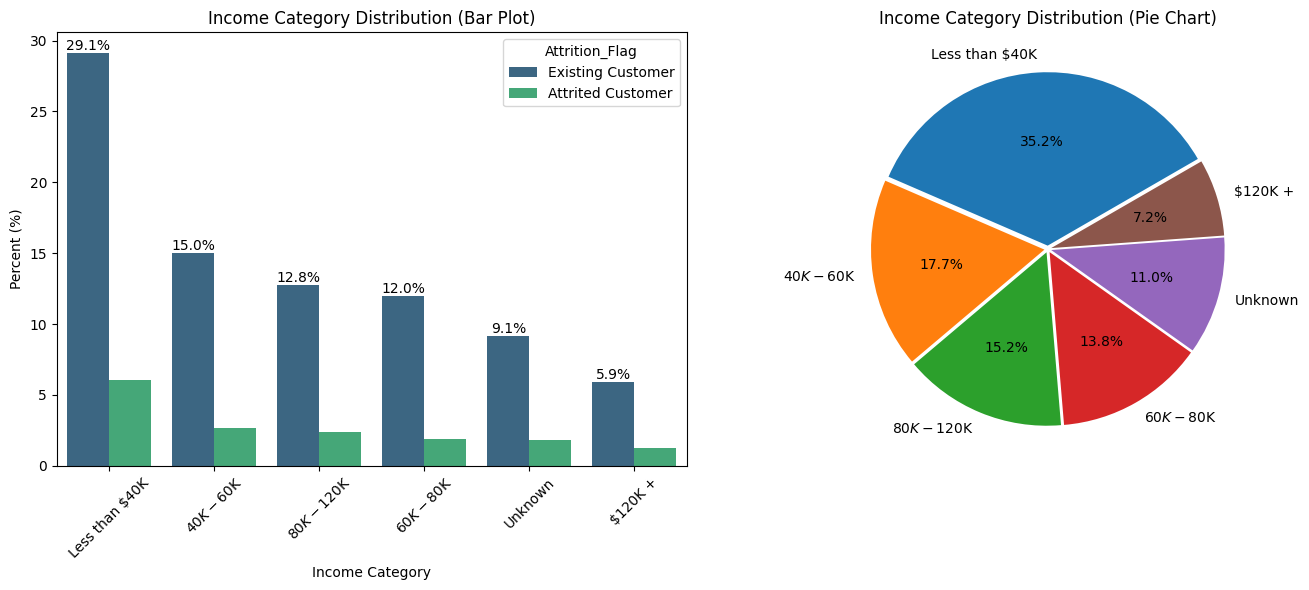

In [55]:
# Calculate counts of each income category
counts_income_category = churners_df['Income_Category'].value_counts()

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
sns.countplot(data=churners_df, x='Income_Category', hue= 'Attrition_Flag', order=counts_income_category.index, stat='percent',palette='viridis', ax=axs[0])
axs[0].set_title('Income Category Distribution (Bar Plot)')
axs[0].set_xlabel('Income Category')
axs[0].set_ylabel('Percent (%)')
axs[0].tick_params(axis='x', rotation=45)
axs[0].bar_label(axs[0].containers[0], fontsize=10, fmt='%.1f%%')

# Pie chart
axs[1].pie(counts_income_category, labels=counts_income_category.index, autopct='%1.1f%%',
           startangle=30, explode=[0.02] * len(counts_income_category))
axs[1].set_title('Income Category Distribution (Pie Chart)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


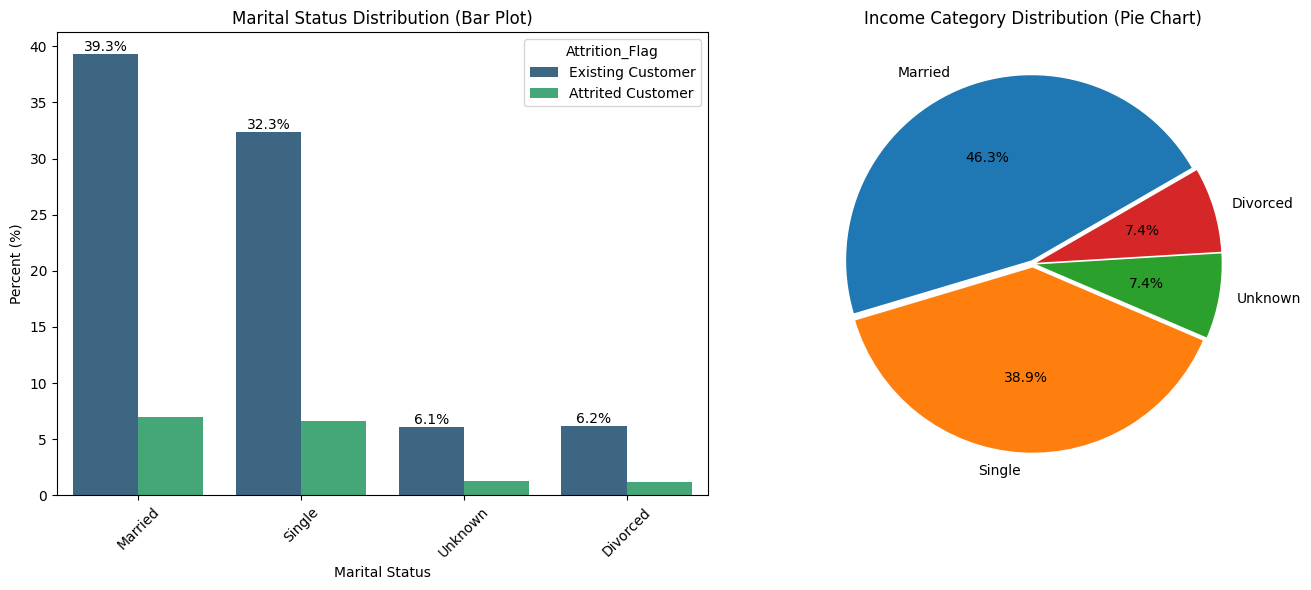

In [56]:
# Calculate counts of each income category
counts_marital_status = churners_df['Marital_Status'].value_counts()

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
sns.countplot(data=churners_df, x='Marital_Status', hue= 'Attrition_Flag', order=counts_marital_status.index, stat='percent',palette='viridis', ax=axs[0])
axs[0].set_title('Marital Status Distribution (Bar Plot)')
axs[0].set_xlabel('Marital Status')
axs[0].set_ylabel('Percent (%)')
axs[0].tick_params(axis='x', rotation=45)
axs[0].bar_label(axs[0].containers[0], fontsize=10, fmt='%.1f%%')

# Pie chart
axs[1].pie(counts_marital_status, labels=counts_marital_status.index, autopct='%1.1f%%',
           startangle=30, explode=[0.02] * len(counts_marital_status))
axs[1].set_title('Income Category Distribution (Pie Chart)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


In [57]:
# Check all columns for unknown values and which 'Attrition_Flag' has unknown values
for col in churners_df.columns:
    unknown_var = (churners_df[col] == 'Unknown').any()
    if unknown_var:
        print(f"'{col}' has unknown values: {unknown_var}")
    else: pass


'Education_Level' has unknown values: True
'Marital_Status' has unknown values: True
'Income_Category' has unknown values: True


In [58]:
for col in churners_df.columns:
    unknown_var = churners_df[col][churners_df[col] == 'Unknown'].count()
    if unknown_var > 0:
        print(f"Column '{col}' has {unknown_var} unknown values")
    else: pass

Column 'Education_Level' has 1519 unknown values
Column 'Marital_Status' has 749 unknown values
Column 'Income_Category' has 1112 unknown values


In [59]:
# Check 'Unknown' values of the column 'Education_Level'
qr_edl = (churners_df['Education_Level'] == 'Unknown')
educ_lv = churners_df[qr_edl]['Attrition_Flag'].value_counts()
print(f"Education_Level (Unknown):\n{educ_lv}")


Education_Level (Unknown):
Attrition_Flag
Existing Customer    1263
Attrited Customer     256
Name: count, dtype: int64


In [60]:
# Check 'Unknown' values of the Marital_Status column
qr_mrs = (churners_df['Marital_Status'] == 'Unknown')
mar_sta = churners_df[qr_mrs]['Attrition_Flag'].value_counts()
print(f"Marital Status (Unknown):\n{mar_sta}")

Marital Status (Unknown):
Attrition_Flag
Existing Customer    620
Attrited Customer    129
Name: count, dtype: int64


In [61]:
# Check 'Unknown' values of the Income_Category column
qr_icc = (churners_df['Income_Category'] == 'Unknown')
inc_cat = churners_df[qr_icc]['Attrition_Flag'].value_counts()
print(f"Income Category (Unknown):\n{inc_cat}")

Income Category (Unknown):
Attrition_Flag
Existing Customer    925
Attrited Customer    187
Name: count, dtype: int64


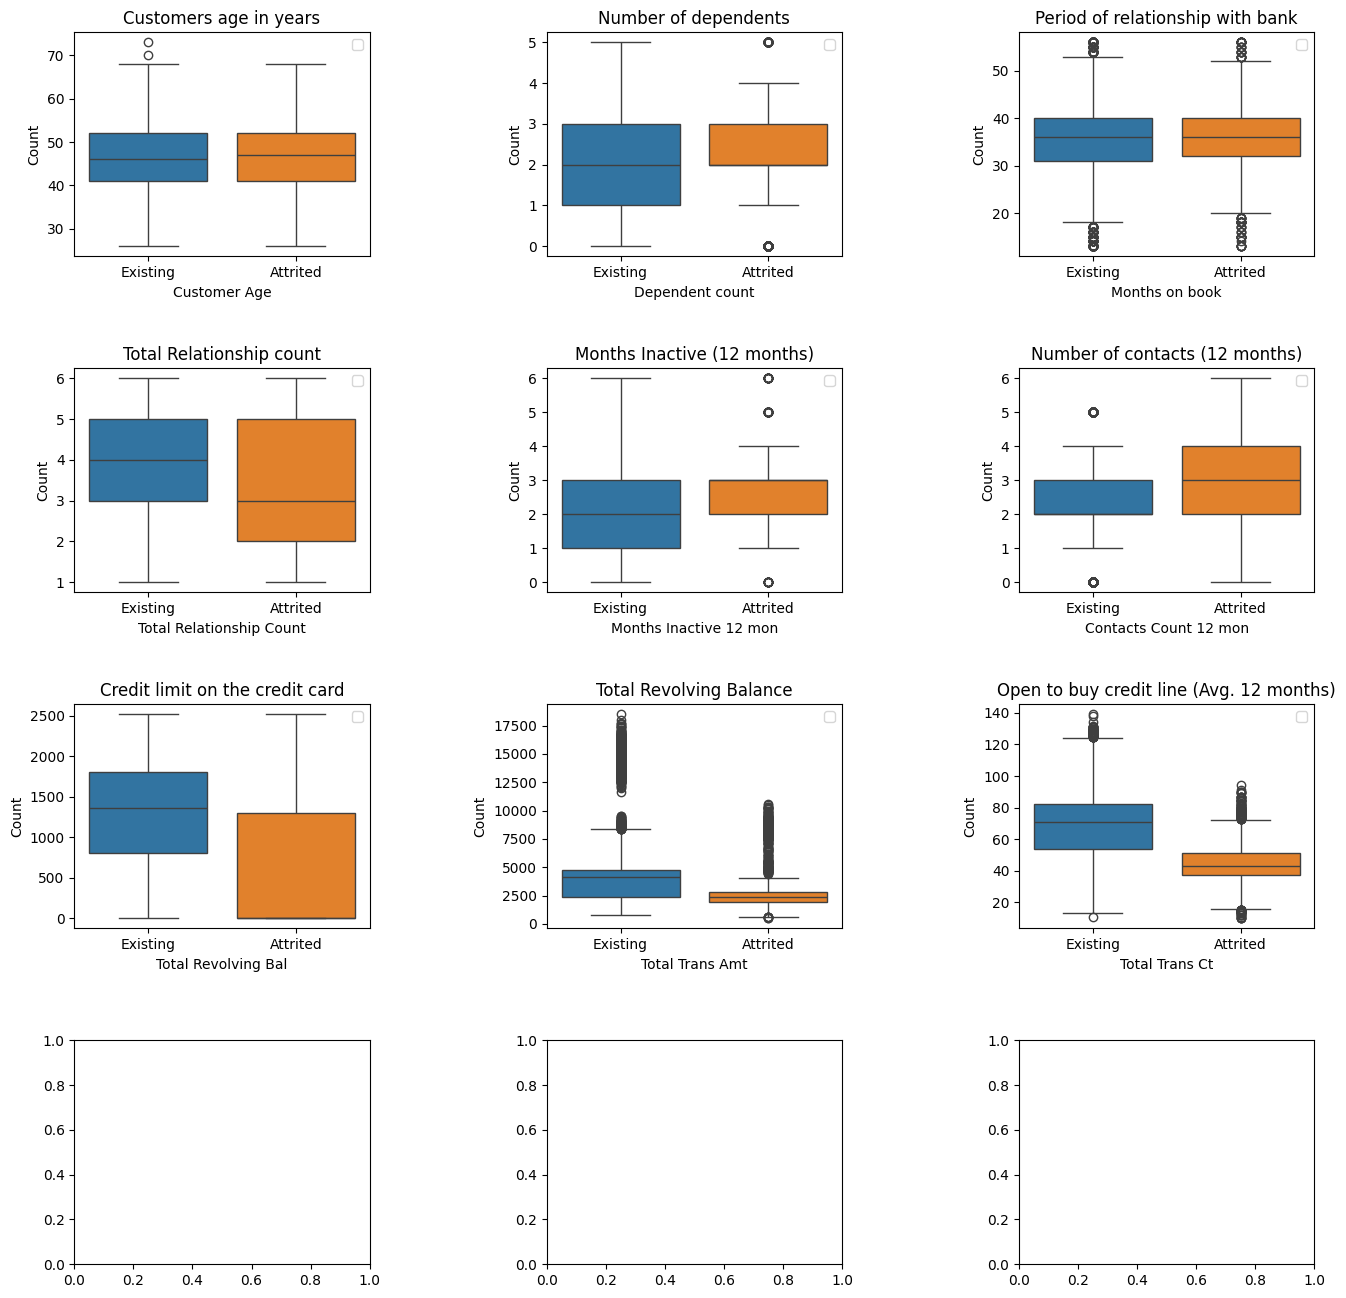

In [76]:
# Explore Numerical columns

fig2, axarr2 = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(hspace=0.5, wspace=0.6)

# Configure new title
titles_num = ['Customers age in years', 'Number of dependents', 'Period of relationship with bank',
              'Total Relationship count', 'Months Inactive (12 months)', 'Number of contacts (12 months)',
              'Credit limit on the credit card', 'Total Revolving Balance', 'Open to buy credit line (Avg. 12 months)',
              'Change in transaction amount (Q3/Q1)', 'Total transaction amount', 'Total transaction count',
              'Change in transaction count (Q3/Q1)', 'Average card utilization ratio']

# Generate box plot using loop
for i, col in enumerate(num_cols):
    sns.boxplot(data=churners_df, x=churners_df['Attrition_Flag'], y=churners_df[col], hue='Attrition_Flag', ax=axarr2[i // 3][i % 3])
    axarr2[i // 3][i % 3].set_xlabel(col.replace('_', ' '))
    axarr2[i // 3][i % 3].set_ylabel('Count')

    # Set ticks and labels
    axarr2[i // 3][i % 3].set_xticks(range(2))
    axarr2[i // 3][i % 3].set_xticklabels(['Existing', 'Attrited'], rotation=0)
    axarr2[i // 3][i % 3].set_title(titles_num[i])
    axarr2[i // 3][i % 3].legend([])


plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

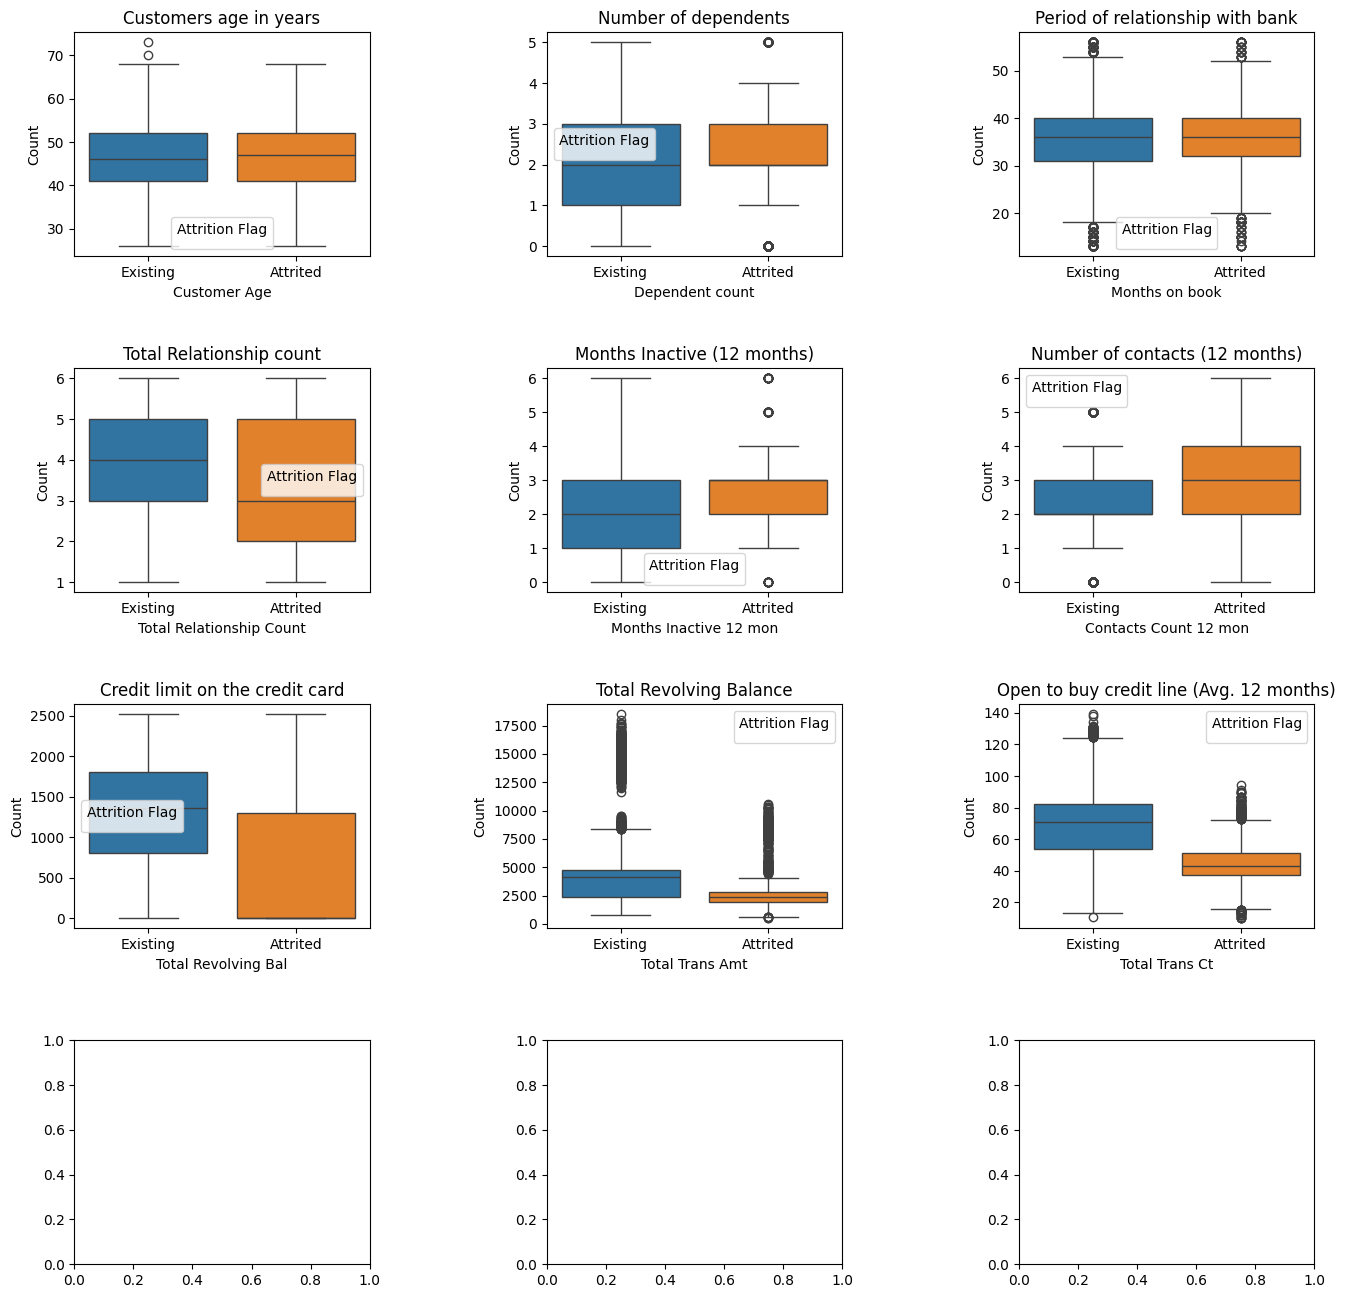

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explore Numerical columns
fig2, axarr2 = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(hspace=0.5, wspace=0.6)

# Configure new title
titles_num = ['Customers age in years', 'Number of dependents', 'Period of relationship with bank',
              'Total Relationship count', 'Months Inactive (12 months)', 'Number of contacts (12 months)',
              'Credit limit on the credit card', 'Total Revolving Balance', 'Open to buy credit line (Avg. 12 months)',
              'Change in transaction amount (Q4/Q1)', 'Total transaction amount', 'Total transaction count',
              'Change in transaction count (Q4/Q1)', 'Average card utilization ratio']

# Generate box plot using loop
for i, col in enumerate(num_cols):
    sns.boxplot(data=churners_df, x='Attrition_Flag', y=col, hue='Attrition_Flag', ax=axarr2[i // 3][i % 3])
    axarr2[i // 3][i % 3].set_xlabel(col.replace('_', ' '))
    axarr2[i // 3][i % 3].set_ylabel('Count')

    # Set ticks and labels
    axarr2[i // 3][i % 3].set_xticks(range(2))
    axarr2[i // 3][i % 3].set_xticklabels(['Existing', 'Attrited'], rotation=0)
    axarr2[i // 3][i % 3].set_title(titles_num[i])
    axarr2[i // 3][i % 3].legend(title='Attrition Flag')

# Hide empty subplots if the number of numerical columns is not a multiple of 3
if len(num_cols) % 3 != 0:
    for j in range(len(num_cols) % 3, 3):
        fig2.delaxes(axarr2[-1, j])

plt.show()


In [63]:
plt.figure(figsize=(10, 10))
# sns.pairplot(data=churners_df, hue='Attrition_Flag')
plt.suptitle('Pairplot of Bank Churners', fontsize = 15, y = 1.02)

Text(0.5, 1.02, 'Pairplot of Bank Churners')

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Correlation heatmap')

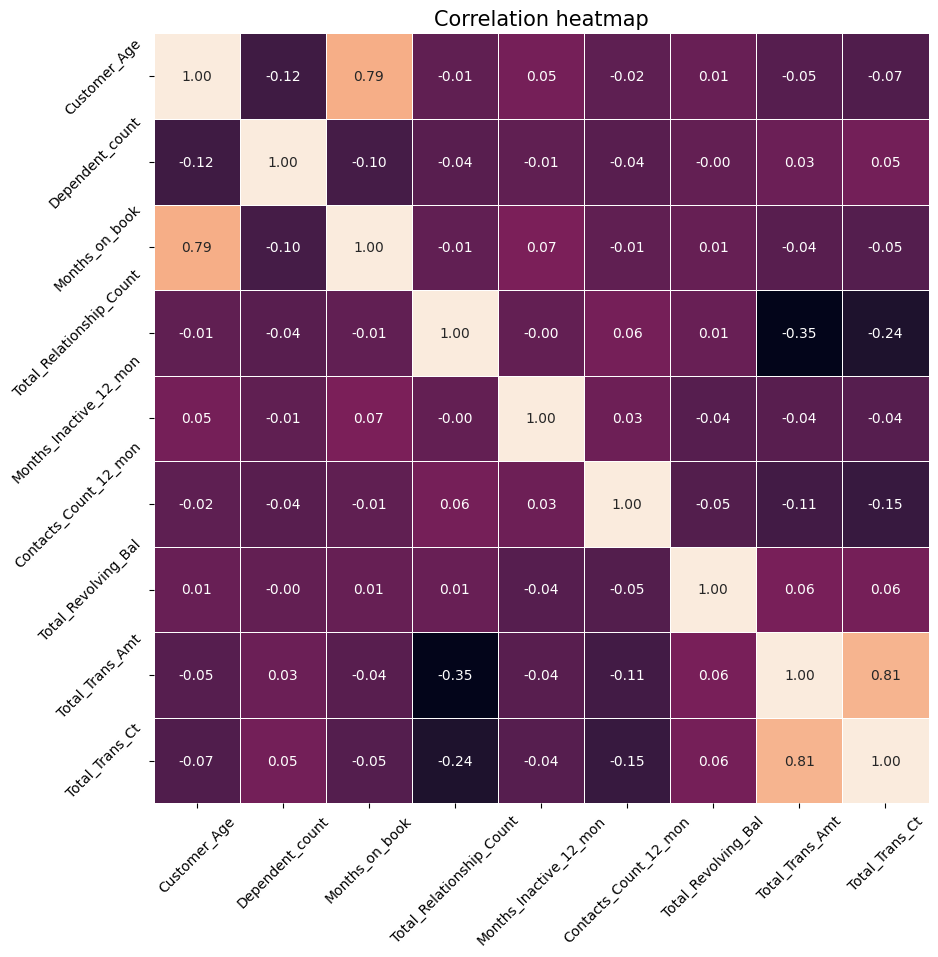

In [64]:
# Create heatmap
corr_matrix = churners_df[num_cols].corr()
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True, cbar=False, linewidths=.5, fmt= '.2f', ax=axes)
axes.tick_params(labelrotation=45)
plt.title('Correlation heatmap', fontsize = 15)

In [65]:
# Identify outliers with z-score
churners_df[num_cols].apply(stats.zscore)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,-0.473422,-0.959707,-0.973895
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.366667,-0.916433,-1.357340
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-1.426858,-0.740982,-1.911206
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,1.661686,-0.951758,-1.911206
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-1.426858,-1.056263,-1.570365
...,...,...,...,...,...,...,...,...,...
10122,0.458314,-0.266547,0.509840,-0.522785,-0.337598,0.492404,0.844455,3.259358,2.221481
10123,-0.664382,-0.266547,-1.368442,0.120579,-0.337598,0.492404,1.255524,1.283475,0.176440
10124,-0.290150,-1.036462,0.008965,0.763943,0.651940,1.396424,-1.426858,1.732994,-0.207005
10125,-2.036565,-0.266547,0.008965,0.120579,0.651940,0.492404,-1.426858,1.174848,-0.121795


In [66]:
# Write df to csv
churners_df.to_csv('churners_df.csv', index=False)